# Data Analysis

This are charts to illustrate the behavior of different curves under the effect of variation of vanishing policies. 

In [1]:
import symupy
import pandas as pd
import numpy as np 
import os
import sys
import re
from itertools import repeat, chain
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
import matplotlib.pyplot as plt 

# try:
#     pd.set_option('plotting.backend', 'hvplot')
# except: 
#     pass
print(f"Backend: {pd.options.plotting.backend}")

from symupy.api import Simulator,Simulation

print(f"Version of symupy: {symupy.__version__}")

packages = ['src', 'data/results/']

# Adding supplementary functions 
for pck in packages:
    print(f"Adding folder: {pck}")
    sys.path.append(os.path.join(os.getcwd(),f"../{pck}"))


Successful import of symupy
Backend: matplotlib
Version of symupy: 0.2.3
Adding folder: src
Adding folder: data/results/



Bad key "text.kerning_factor" on line 4 in
/Users/andresladino/opt/anaconda3/envs/isttt24/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# ==============
# Widgets
# ==============

zones_cpt = [f'Cpt_{x}' for x in list(np.arange(0,9)+1)]

zonewdgt = widgets.RadioButtons(
    options = zones_cpt,
    value=zones_cpt[4], # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Zone:',
    disabled=False
)
prc_sel = widgets.SelectMultiple(
    options=['All',0,10,20,30,40,50,70],
    value=['All'],
    #rows=10,
    description='Vanishing Policy',
    disabled=False
)

In [3]:
# ==============
# Plot functions 
# ==============

def load_data(zone = 'Cpt_5'):
    """Reading and loading files"""
    
    output_dir = os.listdir('../data/results')
    output_dir = sorted(output_dir)[2:-1] # Picking good cases

    full_ttt = []
    full_ttd = []
    full_spd = []
    full_ctr = []
    for case in output_dir:
        load_dir = os.getcwd()+'/../data/results/'+ case+'/'
        
        filettt = load_dir +'ttt.csv'
        filettd = load_dir +'ttd.csv'
        filespd = load_dir +'spd.csv'
        filectr = load_dir +'ctr.csv'
        
        ttt = pd.read_csv(filettt)        
        ttd = pd.read_csv(filettd)
        spd = pd.read_csv(filespd)
        ctr = pd.read_csv(filectr)
        
        full_ttt.append(ttt)
        full_ttd.append(ttd)
        full_spd.append(spd)
        full_ctr.append(ctr)        

    key_prc = [0,10,20,30,40,50,70]
    dfttt = pd.concat(full_ttt, keys = key_prc, axis = 0)
    dfttd = pd.concat(full_ttd, keys = key_prc, axis = 0)
    dfspd = pd.concat(full_spd, keys = key_prc, axis = 0)
    dfctr = pd.concat(full_ctr, keys = key_prc, axis = 0)
    return dfttt,dfttd, dfspd,dfctr 

def filter_data(var, zone='Cpt_5'):
    return var.unstack(level=0)[zone]

data = load_data() 

def plot_data(zone='Cpt_5',prc = None):
    data_flt = [filter_data(var) for var in data]        
    df=pd.concat(data_flt,keys = ['TTT','TTD','SPD','CTR'])

    print(prc)
    
    if prc[0]=="All" or prc is None:
        df = df.reset_index(level=0);
    else:
        df = df.loc[:,prc] 
        df = df.reset_index(level=0)        
  
    for title, group in df.groupby('level_0'):
        group.plot(title=title, grid = True, figsize=(7,5))

   

In [4]:
data_view = widgets.interactive(plot_data,zone=zonewdgt, prc=prc_sel)
zonewdgt.observe(lambda x: data_view.update(), 'value')
display(data_view)

interactive(children=(RadioButtons(description='Zone:', index=4, options=('Cpt_1', 'Cpt_2', 'Cpt_3', 'Cpt_4', …

## Routing Data 

We analize here the number of reroutings per case 

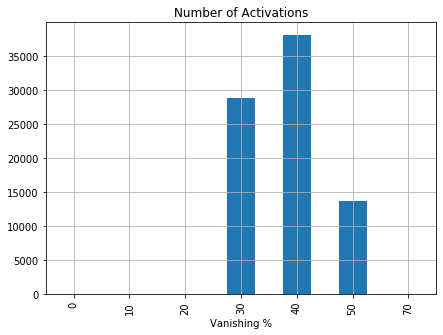

In [5]:
## Rerouting data 

def load_data_routing():
    output_dir = os.listdir('../data/results')
    output_dir = sorted(output_dir)[2:-1] # Picking good cases

    lst_route = []
    for case in output_dir:
        load_dir = os.getcwd()+'/../data/results/'+ case+'/OUT/defaultOut_ctrlzonedata_.csv'
        routing = pd.read_csv(load_dir)
        lst_route.append(routing)
    return lst_route

lst_route = load_data_routing()
key_prc = [0,10,20,30,40,50,70]
dfrt = pd.concat(lst_route, keys= key_prc,axis=0)
dfrt = dfrt.reset_index(level=0)
dfrt.rename(columns={'level_0': 'Vanishing %'}, inplace=True)
dfrt.groupby('Vanishing %').sum()['activation'].plot(kind='bar',title='Number of Activations', grid = True, figsize = (7,5));

Number of activations distributed per zone:

In [6]:
dfgrp = dfrt.groupby(['zone','Vanishing %',]).sum()
dfgrp['activation'].unstack(level='zone')

zone,331,332,333,334,335,336,337,338,339
Vanishing %,,,,,,,,,
0,5.0,5.0,6.0,2.0,2.0,4.0,1.0,4.0,3.0
10,2.0,2.0,NaN,2.0,1.0,1.0,NaN,1.0,2.0
20,2.0,2.0,NaN,2.0,1.0,1.0,NaN,1.0,2.0
30,2.0,4.0,1.0,5.0,28758.0,1.0,2.0,5.0,6.0
40,3.0,4.0,NaN,2.0,38042.0,2.0,NaN,5.0,7.0
50,2.0,3.0,NaN,2.0,13712.0,3.0,NaN,2.0,3.0
70,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Andres L.